Количество строк после очистки: 336


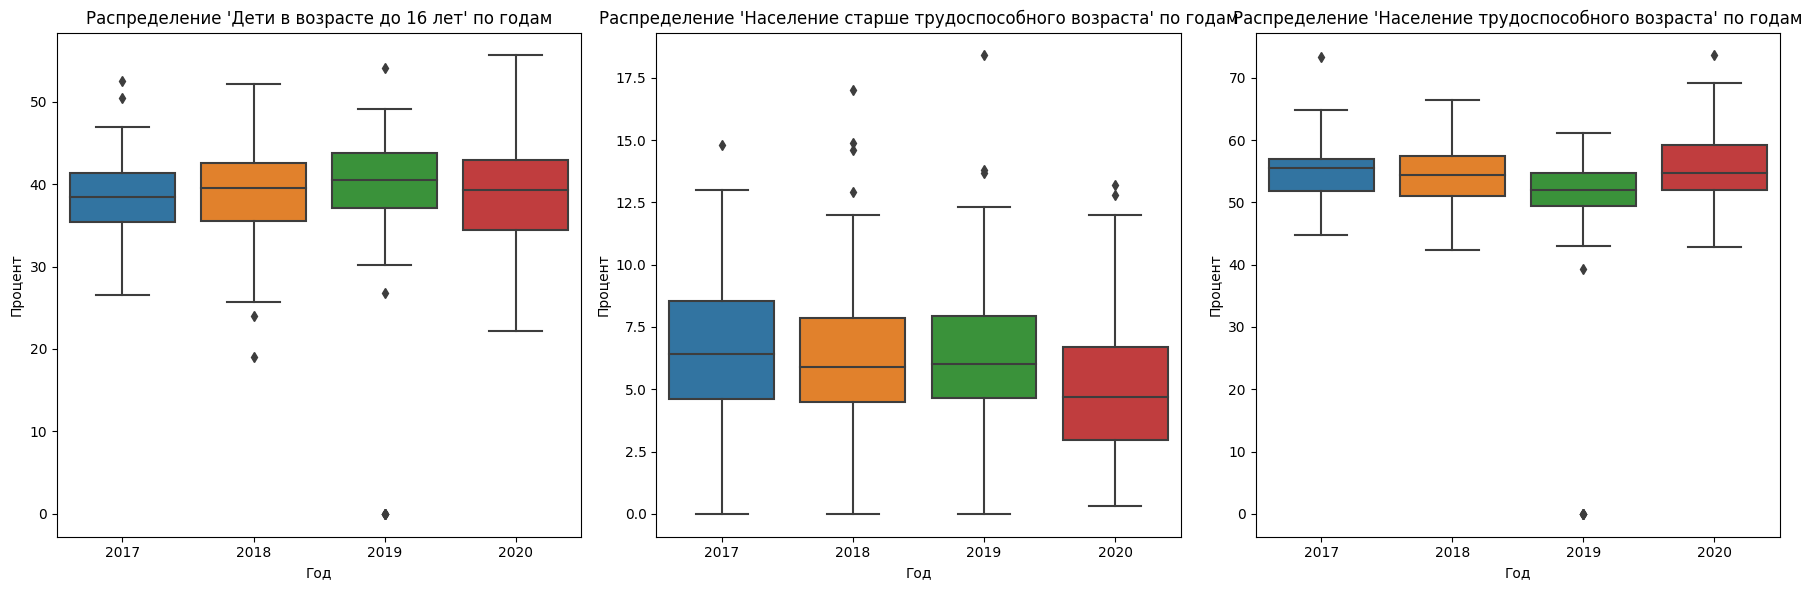

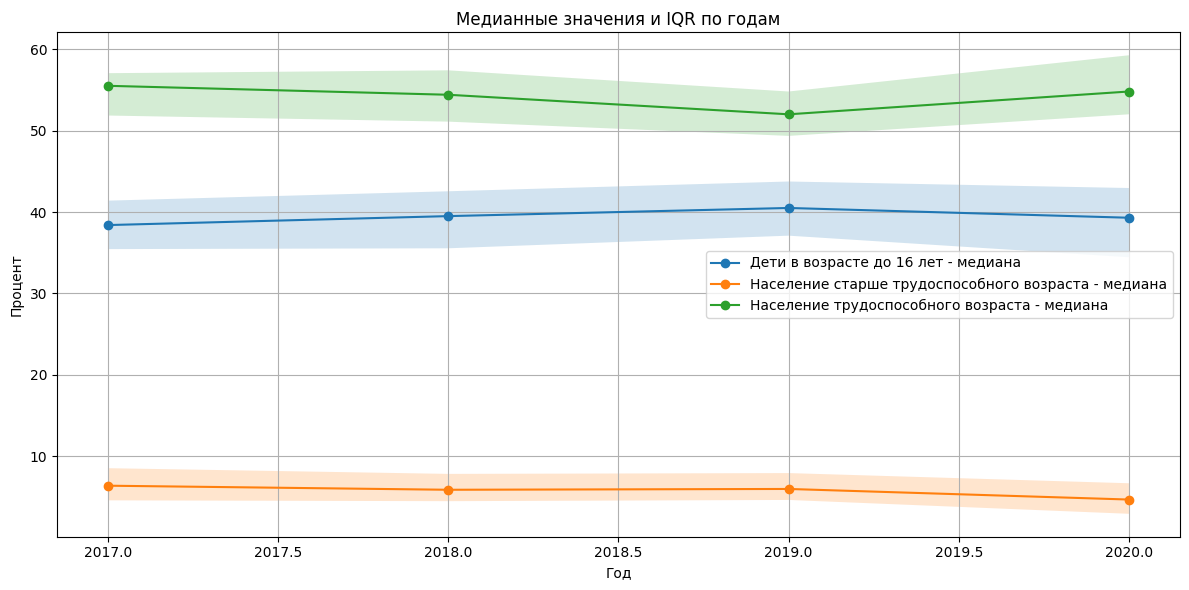

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Загрузка данных
file_path = "../../outputs/standardized_datasets/poverty_socdem_standardized.csv"
df = pd.read_csv(file_path)

# 2. Оставляем только строки с region_standard
df = df[df["region_standard"].notna()]

# 3. Приводим числовые признаки
numeric_cols = [
    "Дети в возрасте до 16 лет",
    "Население старше трудоспособного возраста",
    "Население трудоспособного возраста"
]
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors="coerce")

# 4. Удаляем строки с пропусками
df = df.dropna(subset=numeric_cols)

print(f"Количество строк после очистки: {len(df)}")

# 5. Boxplot по годам
plt.figure(figsize=(18,6))
for i, col in enumerate(numeric_cols):
    plt.subplot(1,3,i+1)
    sns.boxplot(x="year", y=col, data=df)
    plt.title(f"Распределение '{col}' по годам")
    plt.xlabel("Год")
    plt.ylabel("Процент")
plt.tight_layout()
plt.show()

# 6. График медианы и IQR по годам
plt.figure(figsize=(12,6))
for col in numeric_cols:
    grouped = df.groupby("year")[col]
    med = grouped.median()
    q1 = grouped.quantile(0.25)
    q3 = grouped.quantile(0.75)
    plt.plot(med.index, med.values, marker="o", label=f"{col} - медиана")
    plt.fill_between(med.index, q1.values, q3.values, alpha=0.2)
plt.title("Медианные значения и IQR по годам")
plt.xlabel("Год")
plt.ylabel("Процент")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# EDA таблицы `poverty_socdem_standardized.csv`

**Описание данных**
- ~340 записей после фильтрации и удаления пропусков.
- Период: 2017–2020.
- Показатели: доли детей, трудоспособного населения и пожилых людей.

---

**Типы данных**
- Все признаки корректны и приведены к числовым.

---

**Пропуски**
- Изначально было 12 пропусков в трёх колонках.
- Для чистоты анализа они удалены.

---

**Основные наблюдения**
- Доля детей в большинстве регионов ~35–42%.
- Доля населения старше трудоспособного возраста стабильна на уровне ~5–6%.
- Доля трудоспособного населения ~54%.


---

**Вывод**
- Данные очищены от агрегатов и пропусков.
- Готовы к дальнейшему анализу.
- При необходимости можно заполнить пропуски медианными значениями по году и региону вместо удаления.


In [2]:
# Cохранение результатов после EDA
df.to_csv("../../data/clean/socdem_AfterEDA.csv", index=False)